Shortest path from Fullerton to Long Beach: [0, 12, 1], Distance: 27.37 km
Shortest path from Fullerton to Brea: [0, 2], Distance: 6.00 km
Shortest path from Fullerton to Placentia: [0, 3], Distance: 5.67 km
Shortest path from Fullerton to Yorba Linda: [0, 4], Distance: 9.44 km
Shortest path from Fullerton to Bueuna Park: [0, 5], Distance: 6.44 km
Shortest path from Fullerton to Cerritos: [0, 6], Distance: 11.89 km
Shortest path from Fullerton to Anaheim: [0, 7], Distance: 3.87 km
Shortest path from Fullerton to Norwalk: [0, 8], Distance: 14.30 km
Shortest path from Fullerton to Bellflower: [0, 5, 9], Distance: 17.89 km
Shortest path from Fullerton to La Mirada: [0, 10], Distance: 9.00 km
Shortest path from Fullerton to Lakewood: [0, 6, 11], Distance: 19.47 km
Shortest path from Fullerton to Los Alamitos: [0, 12], Distance: 15.45 km
Shortest path from Fullerton to Seal Beach: [0, 12, 13], Distance: 23.15 km
Shortest path from Fullerton to La Habra: [0, 14], Distance: 7.13 km
Shortest p

C:\Users\Chathrapathi nikhil\AppData\Local\Temp\ipykernel_2576\421035202.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


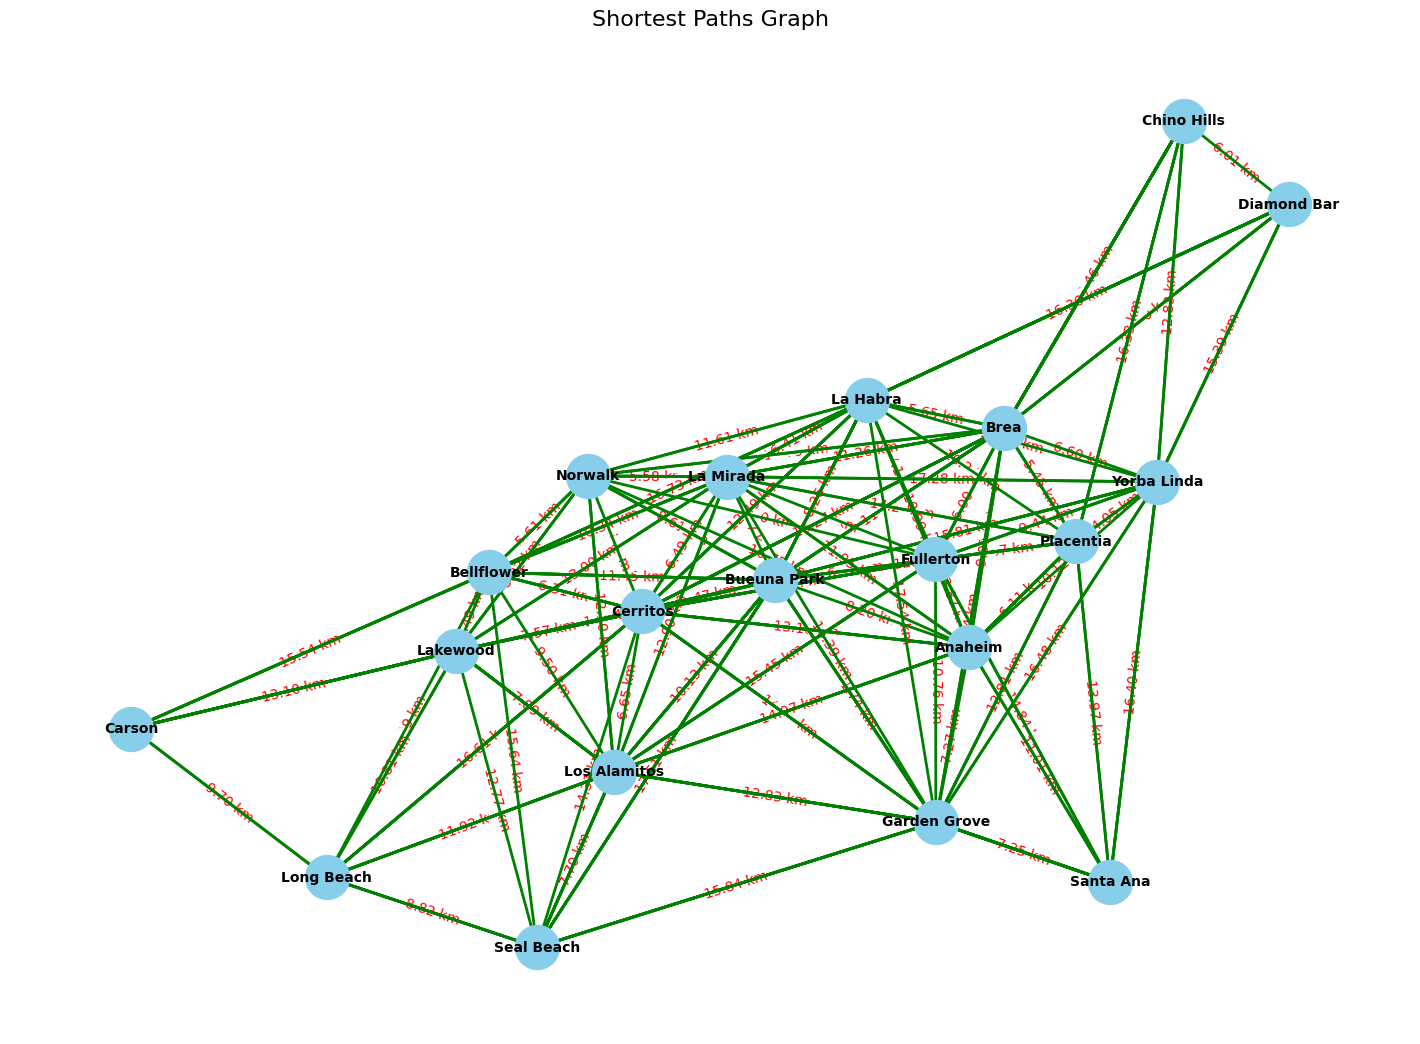

Graph exported to 'graph.graphml'


In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate the distance between two locations
def calculate_distance(loc1, loc2):
    lat1, lon1 = loc1['lat'], loc1['lon']
    lat2, lon2 = loc2['lat'], loc2['lon']
    # Using Haversine formula to calculate the distance between two coordinates
    radius = 6371  # Radius of the Earth in kilometers
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = radius * c
    return distance

# Function to create a graph from locations
def create_graph(locations):
    num_locations = len(locations)
    G = nx.Graph()

    # Add nodes
    for i in range(num_locations):
        G.add_node(i, name=locations[i]['name'])

    # Calculate distances between all pairs of locations and store them in a list
    distances = []
    for i in range(num_locations):
        for j in range(i + 1, num_locations):
            distance = calculate_distance(locations[i], locations[j])
            distances.append(distance)

    # Calculate the median distance
    median_distance = np.median(distances)

    # Add edges with weights (distances) less than the median distance
    for i in range(num_locations):
        for j in range(i + 1, num_locations):
            distance = calculate_distance(locations[i], locations[j])
            if distance < median_distance:
                G.add_edge(i, j, weight=distance)

    return G

# Function to find and print the shortest paths using Floyd-Warshall algorithm
def floyd_warshall(graph):
    num_nodes = len(graph.nodes)
    distances = np.full((num_nodes, num_nodes), np.inf)

    # Set diagonal elements to 0
    np.fill_diagonal(distances, 0)

    # Set known distances from the graph
    for edge in graph.edges(data=True):
        distances[edge[0]][edge[1]] = edge[2]['weight']
        distances[edge[1]][edge[0]] = edge[2]['weight']

    # Floyd-Warshall algorithm
    for k in range(num_nodes):
        for i in range(num_nodes):
            for j in range(num_nodes):
                if distances[i][k] + distances[k][j] < distances[i][j]:
                    distances[i][j] = distances[i][k] + distances[k][j]

    # Print shortest paths
    shortest_paths = []
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            try:
                path = nx.shortest_path(graph, source=i, target=j, weight='weight')
                shortest_paths.append((i, j, path, distances[i][j]))
                print(f"Shortest path from {graph.nodes[i]['name']} to {graph.nodes[j]['name']}: {path}, Distance: {distances[i][j]:.2f} km")
            except nx.NetworkXNoPath:
                print(f"No path from {graph.nodes[i]['name']} to {graph.nodes[j]['name']}")

    return shortest_paths, distances

# Function to visualize the graph with shortest paths
def visualize_graph(graph, shortest_paths):
    # Increase the figure size
    plt.figure(figsize=(14, 10))

    # Use the Kamada-Kawai layout algorithm for better node placement
    pos = nx.kamada_kawai_layout(graph)

    # Create a mapping of node indices to location names
    labels = {i: graph.nodes[i]['name'] for i in graph.nodes()}

    # Draw the graph with larger node size and location name labels
    nx.draw(graph, pos, labels=labels, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold')

    # Draw edge labels (weights)
    edge_labels = {(i, j): f"{graph[i][j]['weight']:.2f} km" for i, j in graph.edges()}
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='red')

    # Highlight the shortest paths
    for path_info in shortest_paths:
        i, j, path, _ = path_info
        edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
        # Check if the nodes in the path exist in the pos dictionary
        valid_edges = [edge for edge in edges if edge[0] in pos and edge[1] in pos]
        nx.draw_networkx_edges(graph, pos, edgelist=valid_edges, edge_color='green', width=2)

    # Show the plot
    plt.axis('off')  # Hide the axis
    plt.title('Shortest Paths Graph', fontsize=16)
    plt.tight_layout()
    plt.show()

# Rest of the code (locations array, creating the graph, finding shortest paths, exporting the graph) remains the same

# Define the locations array
locations = [
    { "name": 'Fullerton', "lat": 33.8704, "lon": -117.9242 },
    { "name": 'Long Beach', "lat": 33.770050, "lon": -118.193741 },
    { "name": 'Brea', "lat": 33.915279, "lon": -117.888207 },
    { "name": 'Placentia', "lat": 33.871075, "lon": -117.862755 },
    { "name": 'Yorba Linda', "lat": 33.888531, "lon": -117.824310 },
    { "name": 'Bueuna Park', "lat": 33.869110, "lon": -117.993952 },
    { "name": 'Cerritos', "lat": 33.862607, "lon": -118.052657 },
    { "name": 'Anaheim', "lat": 33.836594, "lon": -117.914299},
    { "name": 'Norwalk', "lat": 33.913780, "lon": -118.070099 },
    { "name": 'Bellflower', "lat": 33.881683, "lon": -118.117012 },
    { "name": 'La Mirada', "lat": 33.908989, "lon": -118.009949 },
    { "name": 'Lakewood', "lat": 33.853626, "lon": -118.133957 },
    { "name": 'Los Alamitos', "lat": 33.804970, "lon": -118.071800 },
    { "name": 'Seal Beach', "lat": 33.741409, "lon": -118.104767 },
    { "name": 'La Habra', "lat": 33.931858, "lon": -117.946136 },
    { "name": 'Garden Grove', "lat": 33.774269, "lon": -117.937996 },
    { "name": 'Santa Ana', "lat": 33.745472, "lon": -117.867653 },
    { "name": 'Carson', "lat": 33.827820, "lon": -118.272346 },
    { "name": 'Chino Hills', "lat": 33.991200, "lon": -117.760861 },
    { "name": 'Diamond Bar', "lat": 34.026490, "lon": -117.810264 },
    # ... (other locations)
]

# Create the graph
graph = create_graph(locations)

# Find and print shortest paths using Floyd-Warshall algorithm
shortest_paths, distances = floyd_warshall(graph)

# Visualize the graph with shortest paths
visualize_graph(graph, shortest_paths)

# Export the graph to a GraphML file
nx.write_graphml(graph, 'graph.graphml')

# Print a message indicating that the graph has been exported
print("Graph exported to 'graph.graphml'")
